In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




Loading And Inspection

In [64]:
df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Handling missing values for columns with missing values

In [65]:

df = df.dropna(subset=['Embarked'])
df.isna().sum().sort_values()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isna().sum().sort_values()

df[['LastName', 'Rest']] = df['Name'].str.split(',', expand=True)

df = df.drop(columns=['Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  LastName     889 non-null    object 
 12  Rest         889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


In [66]:
df['Title'] = df['Rest'].str.split('.').str[0]
df['OtherNames'] = df['Rest'].str.split('.').str[1]
df = df.drop(columns=['Rest'])
df.isna().sum().sort_values()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
LastName         0
Title            0
OtherNames       0
Cabin          687
dtype: int64

In [67]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        889 non-null    object 
 10  Embarked     889 non-null    object 
 11  LastName     889 non-null    object 
 12  Title        889 non-null    object 
 13  OtherNames   889 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 104.2+ KB


Visualizing Relationships

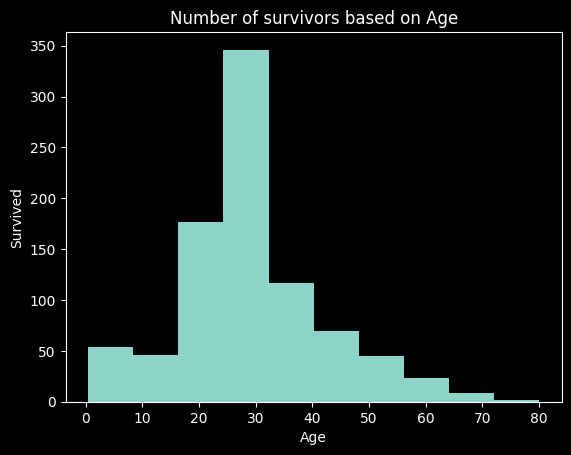

In [91]:
# Number of survivors based on Age
# plt.bar(df['Age'], df['Embarked'])
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Number of survivors based on Age')
plt.show()

Male and Female survivors by Age

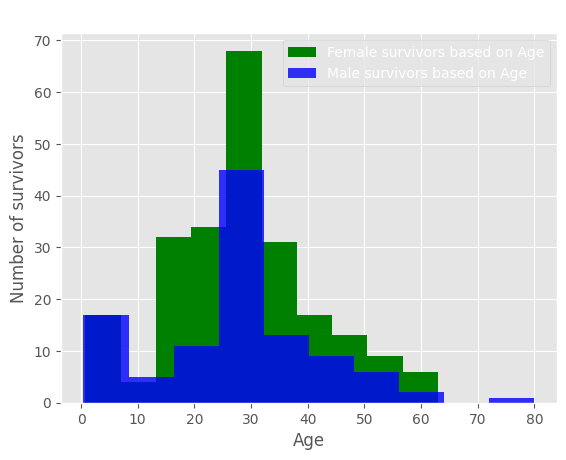

In [100]:
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

plt.hist(female_survived['Age'], bins=10, label='Female survivors based on Age', color='green')
plt.hist(male_survived['Age'], bins=10, label='Male survivors based on Age', color='blue', alpha=0.8)
plt.legend()
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Number of survivors')
plt.title('Number of survivors based on Age')
plt.show()